#Logistic Regression Class

In [ ]:
#import libraries
from IPython.display import display, Math, Latex
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import functools
import itertools

%matplotlib inline

np.random.seed(1234)


In [ ]:
#@title Logistic Regression Class defenition
class Logistic_Regression(object):
  ''' Logistic regression model : y = sigmoid (X@w)'''

  def set_weight_vector(self,w):
    self.w = w
  
  def linear_combination(self, X:np.ndarray):
    return X @ self.w
  
  def sigmoid(self, z:np.ndarray):
    return (1/(1 + np.exp(-z)))
  
  def activation(self, X:np.ndarray):
    '''calculates sigmoid activation for logistic regression as act = sigmoid(Xw)'''

    return self.sigmoid(self.linear_combination(X))
  
  def predict(self, X:np.ndarray, threshold:float = 0.5):
    return (self.activation(X) > threshold).astype(int)
  
  def loss(self,X:np.ndarray,y:np.ndarray, reg_rate:float):
    predicted_prob = self.activation(X)
    loss = (-1 * np.sum(y * np.log(predicted_prob) + (1-y)*np.log(1 - predicted_prob))) + reg_rate * (np.transpose(self.w) @ self.w)
    return loss
  
  def calculate_gradient(self, X:np.ndarray, y:np.ndarray,reg_rate:float):
    grad = np.transpose(X) @ (self.activation(X) - y) + reg_rate * self.w
    return grad
  
  def update_weight(self, grad:np.ndarray, lr:float):
    return (self.w - lr * grad)
  
  def gd(self, X:np.ndarray, y:np.ndarray, num_epochs:int, lr:float, reg_rate:float):
    self.w = np.zeros(X.shape[1])
    self.w_all = []
    self.err_all = []
    for i in np.arange(0, num_epochs):
      dJdw = self.calculate_gradient(X, y, reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X, y, reg_rate))
      self.w = self.update_weight(dJdw, lr)
    return self.w

##STEP1:
Toy dataset Creation:   
Generate two linearly separable classes with 50 samples each. Each sample is represented with two features.

In [ ]:
def create_toy_data():
  x0 = np.random.normal(size=100).reshape(-1,2) + 1 
  x1 = np.random.normal(size=100).reshape(-1,2) - 1
  feature_mat = np.concatenate([x0,x1])
  label_vect = np.concatenate([np.zeros(50),np.ones(50)]).astype(int)
  #np.random.shuffle(label_vect)
  return feature_mat, label_vect

In [ ]:
arr1 = np.concatenate([np.zeros(25),np.ones(25)])
print(arr1)
#np.random.shuffle(arr1)
arr1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
feature_matrix, label_vector = create_toy_data()
print('Feature matrix shape: ', feature_matrix.shape)
print('Label vector shape: ', label_vector.shape)
#print(label_vector)
assert feature_matrix.shape[0] == label_vector.shape[0]

Feature matrix shape:  (100, 2)
Label vector shape:  (100,)


##Step 2:
Add dummy feature corresponding to the bias.   
* the dummy feature can be aaded by performing polynomial transformation of degree=1.

In [ ]:
#@title Polynomial transformation
def get_combinations(X, degree):
  return itertools.combinations_with_replacement(X, degree)

def compute_new_features(items):
  return functools.reduce(lambda x,y:x*y, items)

def polynomial_transform(X, degree):
  if(X.ndim == 1):
    X = X[:,None]
  X_t = np.transpose(X)
  features = [np.ones(X.shape[0])]

  for d in range(1, degree+1):
    for items in get_combinations(X_t, d):
      features.append(compute_new_features(items))
  
  return np.asarray(np.transpose(features))

In [ ]:
feature_matrix_bias = polynomial_transform(feature_matrix,degree=1)

##STEP 3:
Separate data into training and test set


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias, label_vector,train_size=80)

print(x_train.shape[0],  y_train.shape[0])
print(x_test.shape[0],  y_test.shape[0])
assert x_train.shape[0] ==  y_train.shape[0]
assert x_test.shape[0] ==  y_test.shape[0]

80 80
20 20


##Visualize Training Dataset

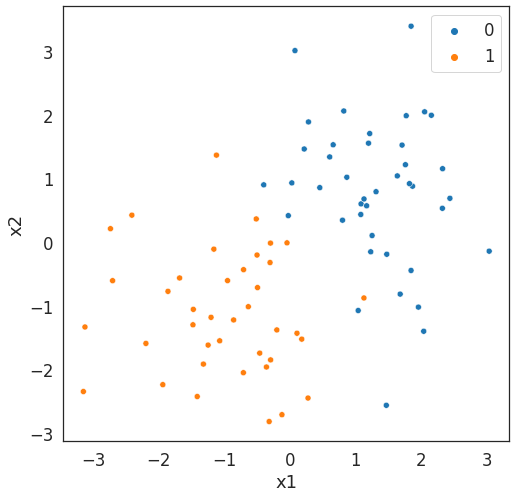

In [ ]:
sns.set_style("white")
f = plt.figure(figsize=(8,8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
sns.scatterplot(data=x_train,x=x_train[:,-2], y=x_train[:,-1], hue=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

##STEP 5:
1. Instantiate a logistic regression object
2. Train the model with gradient descent procedure on the training dataset.

In [ ]:
log_reg = Logistic_Regression()
log_reg.gd(x_train, y_train, num_epochs=1000,reg_rate=0,lr=1e-2)

array([ 0.45996415, -4.7596002 , -2.59553511])

##Plot learnig Curve

In [ ]:
def plot_learning_curve(err):
  plt.plot(err, 'r-')
  plt.xlabel('# iteration')
  plt.ylabel('Loss J(w)')
  plt.show()

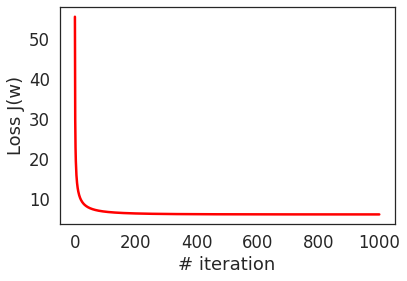

weight vector [ 0.45996415 -4.7596002  -2.59553511]


In [ ]:
plot_learning_curve(log_reg.err_all)
print('weight vector', log_reg.w)

##Model visualization

In [ ]:
def visualize_model(x_train, y_train, log_reg_obj, degree=1):
  sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth":2.5})
  plt.figure(figsize=(8,8))
  #compute xlimit and ylimit
  x1_min = np.min(x_train[:,1])
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2])
  print(x1_min, x1_max, x2_min, x2_max)
  x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max,y_train.shape[0]), np.linspace(x2_min, x2_max,y_train.shape[0]))
  
  x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
  x_test_poly = polynomial_transform(x_test, degree=degree)
  y_test = log_reg_obj.predict(x_test_poly)
  label = y_test.reshape(x1_test.shape)
  sns.scatterplot(data=x_train, x=x_train[:,-2], y=x_train[:,-1],hue=y_train)
  #plt.contourf(x1_test, x2_test,label,alpha=0.5,levels=np.linspace(0,1,3))
  plt.contourf(x1_test, x2_test,label,alpha=0.5,cmap='summer')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal',adjustable='box')
  plt.show()

(80, 3)
-3.14785503764361 3.0306036208387996 -2.818498990391614 3.390960515463033


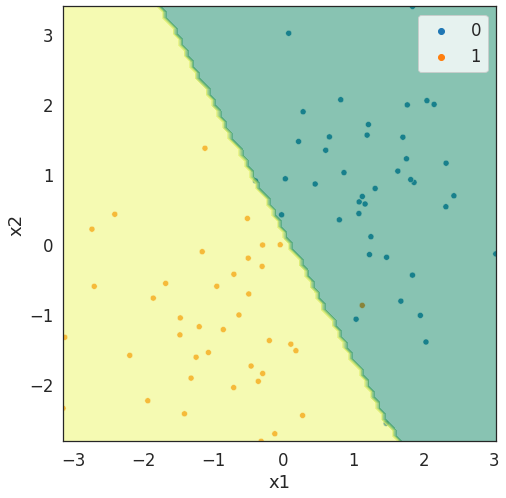

In [ ]:
print(x_train.shape)
visualize_model(x_train, y_train,log_reg)

In [ ]:
a,b = np.meshgrid(np.linspace(0,3,4), np.linspace(0,3,4))
#print(a,b)
#np.array([a,b]).reshape(2,-1).T

In [ ]:
plt.figure(figsize=(8,8))

sns.scatterplot(data=x_train, x=x_train[:,-2], y=x_train[:,-1],hue=y_train)
a1_min = np.min(x_train[:,1])
a1_max = np.max(x_train[:,1])
b1_min = np.min(x_train[:,2])
b1_max = np.max(x_train[:,2])
a,b = np.meshgrid(np.linspace(a1_min,a1_max,y_train.shape[0]), np.linspace(b1_min, b1_max,y_train.shape[0]))
ab = np.array([a,b]).reshape(2,-1).T
ab_poly = polynomial_transform(ab, degree=1)
label_hat = log_reg.predict(ab_poly)
print(a.shape,label_hat.shape,y_train.shape, ab.shape)
plt.contourf(a, b,label_hat.reshape(a.shape), alpha=0.5, levels=np.linspace(0,1,3));

##6. Model Evaluation

In [ ]:
y_test_hat = log_reg.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



#Polynomial Logistic Regression
##Step1:  
Generate samples from two classes sucha that they are separated by a circular decision boundary.

In [ ]:
from sklearn.datasets import make_circles
feature_matrix_cicle, label_vector_circle = make_circles()

assert feature_matrix_cicle.shape[0] == label_vector_circle.shape[0]

In [ ]:
x_poly_circle = polynomial_transform(feature_matrix_cicle,degree=2)

In [ ]:
x_train_circle, x_test_circle, y_train_circle, y_test_circle = train_test_split(x_poly_circle, label_vector_circle)
print(x_train_circle.shape, y_train_circle.shape)
print(x_test_circle.shape, y_test_circle.shape)

(75, 6) (75,)
(25, 6) (25,)


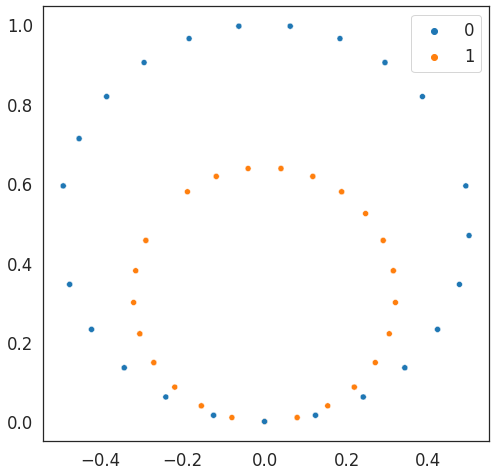

In [ ]:
sns.set_style("white")
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
f = plt.figure(figsize=(8,8))
sns.scatterplot(data=x_train_circle,x=x_train_circle[:,-2],y=x_train_circle[:,-1],hue=y_train_circle)
plt.show()

In [ ]:
log_reg_poly = Logistic_Regression()
log_reg_poly.gd(x_train_circle,y_train_circle,reg_rate=0.001, num_epochs=10000,lr=1e-2)

array([ 19.43807245,   0.09028596,   0.0678063 , -23.87630301,
         0.31158558, -23.67397511])

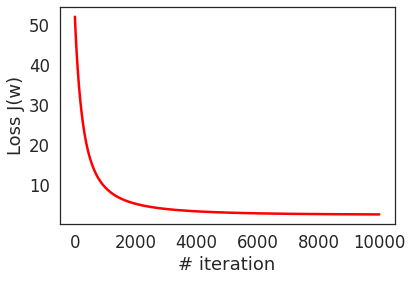

In [ ]:
plot_learning_curve(log_reg_poly.err_all)

In [ ]:
def visualize_model_circle(x_train, y_train, log_reg_obj, degree=2):
  sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth":2.5})
  plt.figure(figsize=(8,8))
  #compute xlimit and ylimit
  x1_min = np.min(x_train[:,1])
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2])
  
  x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max,y_train.shape[0]), np.linspace(x2_min, x2_max,y_train.shape[0]))
  
  x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
  x_test_poly = polynomial_transform(x_test, degree=degree)
  y_test = log_reg_obj.predict(x_test_poly)
  label = y_test.reshape(x1_test.shape)
  sns.scatterplot(data=x_train, x=x_train[:,-2], y=x_train[:,-1],hue=y_train)
  plt.contourf(x1_test, x2_test,y_test.reshape(x1_test.shape),alpha=0.5,levels=np.linspace(0,1,3))
  #plt.contourf(x1_test, x2_test,label,alpha=0.5,cmap='summer')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal',adjustable='box')
  plt.show()

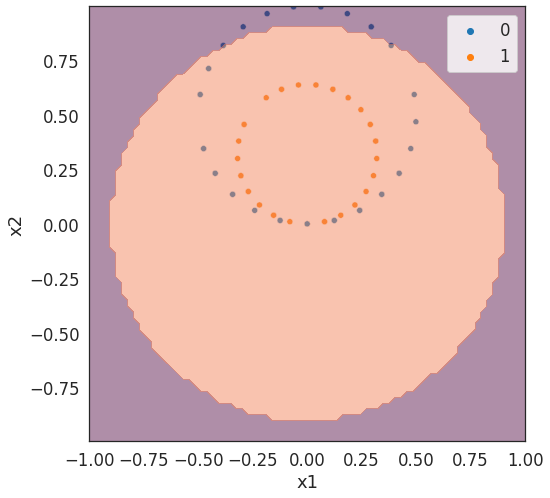

In [ ]:
visualize_model_circle(x_train_circle,y_train_circle,log_reg_poly,degree=2)

In [ ]:
y_test_circle_hat = log_reg_poly.predict(x_test_circle)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_circle,y_test_circle_hat,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
def linear_combination1(X, w):
    return X @ w
  
def sigmoid1(z):
  return (1/(1 + np.exp(-z)))
  
def activation1(X:np.ndarray,w):
  '''calculates sigmoid activation for logistic regression as act = sigmoid(Xw)'''

  return sigmoid1(linear_combination1(X,w))
  
def predict1(X:np.ndarray,w):
  #predicted_labels = [1 if ]
  #return (activation1(X,w) > 0.75).astype(int)
  #print(activation1(X,w))
  sig = activation1(X, w)
  label_p = np.array([1 if a > 0.75 else (-1 if a < 0.25 else 0) for a in activation1(X, w)])
  labels  = np.array([1 if s > 0.75 else (-1 if s < 0.25 else 0) for s in sig])
  print(label_p.shape)
  return label_p


predict1(x_train, log_reg.w)

(80,)


array([ 1,  1, -1, -1, -1,  1,  1, -1,  0,  1,  1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1, -1, -1,  1,  0, -1, -1,  1, -1, -1,  1, -1, -1,
        1, -1,  1, -1,  1, -1, -1,  0, -1,  1, -1,  1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  0])